In [2]:
# If needed, create a virtual environment by uncommenting the line below:
!python -m venv .venv

# Activate the virtual environment by running the appropriate command for your OS:
# On Windows:
# !.\.venv\Scripts\activate

# On macOS/Linux:
!source .agentic_ai_venv/bin/activate 

# Install the required packages by uncommenting the line below:
%pip install -r ./requirements.txt

zsh:source:1: no such file or directory: .agentic_ai_venv/bin/activate
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pathlib import Path
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from typing import Tuple, cast


In [4]:
df = pd.read_csv("pet_adoption_data.csv")

In [5]:
df

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0


In [6]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

<Figure size 1100x600 with 0 Axes>

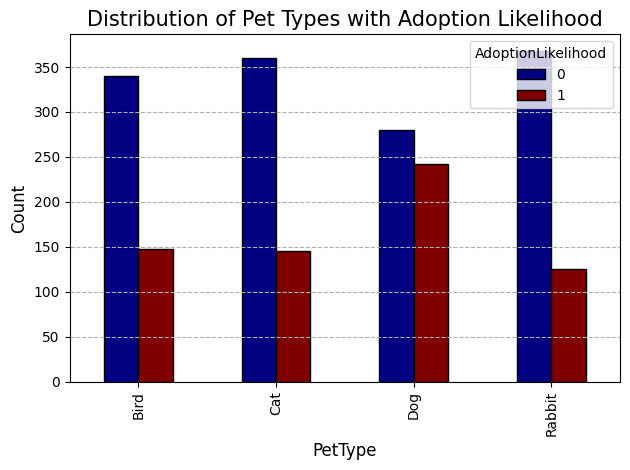

In [7]:
df['PetType'].value_counts()

# Count how many pets per (PetType, AdoptionLikelihood)
counts = df.groupby(['PetType', 'AdoptionLikelihood']).size().unstack(fill_value=0)
plt.figure(figsize=(11,6))
counts.plot(kind='bar', color=plt.cm.jet(np.linspace(0, 1, counts.shape[1])), edgecolor='black')
plt.title('Distribution of Pet Types with Adoption Likelihood', fontsize=15)
plt.xlabel('PetType', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()

<Figure size 1100x600 with 0 Axes>

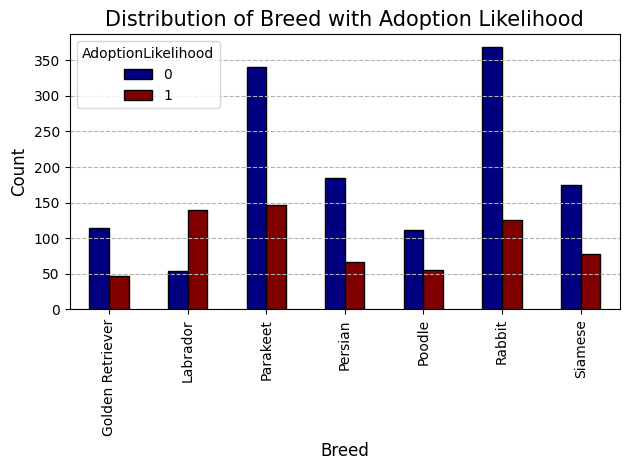

In [8]:
counts = df.groupby(['Breed', 'AdoptionLikelihood']).size().unstack(fill_value=0)
plt.figure(figsize=(11,6))
counts.plot(kind='bar', color=plt.cm.jet(np.linspace(0, 1, counts.shape[1])), edgecolor='black')
plt.title('Distribution of Breed with Adoption Likelihood', fontsize=15)
plt.xlabel('Breed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()

/var/folders/sy/yzs3s3rj1sn1mtlmxbmv67740000gn/T/ipykernel_82894/1762506190.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AgeGroup', 'AdoptionLikelihood']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

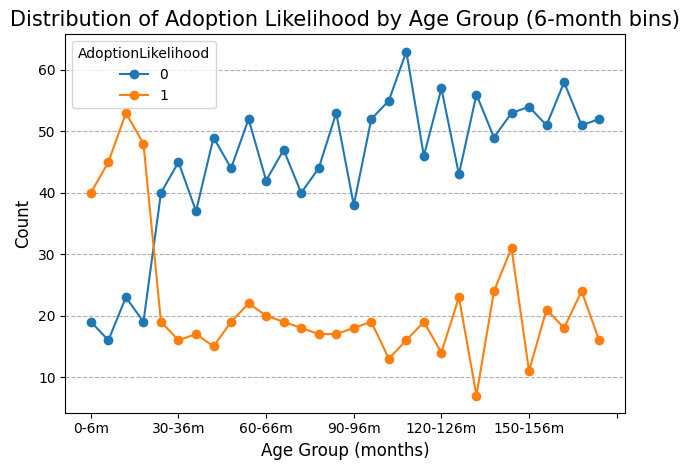

In [9]:
# Create bins of 6 months (same as before)
df['AgeGroup'] = pd.cut(
    df['AgeMonths'],
    bins=np.arange(0, df['AgeMonths'].max() + 6, 6), # Start at 0, end at max age + 6, step by 6 → creates intervals of 6 months
    right=False,
    labels=[f'{i}-{i+6}m' for i in range(0, df['AgeMonths'].max(), 6)] # Creates strings like '0-6m', '6-12m', '12-18m', etc.
)

# Count how many pets per (AgeGroup, AdoptionLikelihood)
counts = df.groupby(['AgeGroup', 'AdoptionLikelihood']).size().unstack(fill_value=0)

# Plot as line graph
plt.figure(figsize=(12,6))
counts.plot(kind='line', marker='o')  # marker='o' adds points to the line

plt.title('Distribution of Adoption Likelihood by Age Group (6-month bins)', fontsize=15)
plt.xlabel('Age Group (months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='AdoptionLikelihood')
plt.tight_layout()
plt.show()